# Contents:

For quick referencing, 

[Getting started](#Getting-started)
1. [ReadMe](#README)
2. [Wikis](#Wikis)
3. [DocString](#DocString)

[Report for solutions and documentation of assumptions](#Report-for-solutions-and-documentation-of-assumptions)
1. [Task #1: Basic Extract-Transform-Loading (ETL)](#Task-#1:-Basic-Extract-Transform-Loading-(ETL))
2. [Task #2: Feature Engineering and Model Building](#Task-#2:-Feature-Engineering-and-Model-Building)
3. [Task #3: Visualization](#Task-#3:-Visualization)
4. [Task #4: PySpark problem](#Task-#4:-Spark-Movie-Recommendation-(optional))

# Getting started

### README

To start this project by cloning from github 

```sh
git clone git@github.com:sakimilo/assessment.git
```

and run 

```sh
sh bin/vEnv.sh
``` 
at root folder `Assessment/` for setting up environment

More instructions of running the program are on README.md at https://github.com/sakimilo/assessment

<img src="../resources/initialSetup.png">

### Wikis
Secondly, codes, explanation and api documentation can be found at https://github.com/sakimilo/assessment/wiki

<br>

<img src="../resources/githubWiki.png">

<br>

### DocString
Thirdly, codes with docstrings documented can be found at `Assessment/docs/index.html`

<img src="../resources/codeDocStringInReadTheDocs.png">

<br>

To kick start the program, you should make sure the current working directory is at `src/` and run 

```Python
python main.py
```

for generating the analytical results

# Report for solutions and documentation of assumptions

### Task #1: Basic Extract-Transform-Loading (ETL)  

In [1]:
import os

os.chdir('../src/')

from modules.dataProcessing import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

fileDict = {
    'rawCombined' : '../data/intermediate/jumboData.snappy.parquet',
    'cleansed'    : '../data/intermediate/jumboData_cleansed.snappy.parquet',
    'engineered'  : '../data/intermediate/jumboData_cleansed_engineered.snappy.parquet'
}

#### 1. Join camp_data.csv with the other 3 files to get country, channel_name, and business_vertical values. The join keys are the label columns in the other 3 csv files.  Below is the results of the joined table:

In [2]:
jumboData = getJoinedData( fileDict)
jumboData[:5]

,capturedDate,business_vertical,country,region,city_code,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions
0,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3714868,Display,1.0,149.565425,48.0,0.0,0.0
1,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3715603,Display,1.0,291.516169,124.0,1.0,0.0
2,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3716560,Display,2.0,509.019147,415.0,0.0,0.0
3,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3718685,Mobile,2.0,134.542628,218.0,0.0,0.0
4,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3718702,Mobile,1.0,3.761886,1.0,0.0,0.0


#### 2. Cleanse the data and handle the missing values. 

In [3]:
jumboData_clean = getCleanseData_handleNUll( fileDict )
jumboData_clean[:5]

,capturedDate,business_vertical,country,region,city_code,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions,median_impressions,median_clicks
0,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3714868,Display,1,149.565425,48.0,0.0,0.0,12.0,0.0
1,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3715603,Display,1,291.516169,124.0,1.0,0.0,12.0,0.0
2,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3716560,Display,2,509.019147,415.0,0.0,0.0,12.0,0.0
3,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3718685,Mobile,2,134.542628,218.0,0.0,0.0,12.0,0.0
4,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3718702,Mobile,1,3.761886,1.0,0.0,0.0,12.0,0.0


A couple of assumptions were made during ETL process,
1. Assuming the null values under goal_type column as 3rd goal type, which is different from goal type 1 & 2. Hence, to fill null goal_type as 3.
2. Assuming the null values under conversions column as "converted"
3. Assuming the null values under impressions column follows the median of impressions by country and region
4. Assuming the null values under clicks column follows the median of clicks by country and region

for more details of how data processing is done, please refer to notebooks/cleansing.ipynb or function `getCleanseData_handleNUll` at `src/modules/dataProcessing.py`

#### 3. Generate total impressions, total clicks, and total conversions by country, channel_name, and business_vertical separately. 

In [4]:
results = generateETLResults( fileDict )

..created table: public.aggByCountry


Uploading data to: public.aggByCountry..: 100%|█████████████████████████████████████████| 1/1 [00:00<00:00, 100.25it/s]


..uploaded data to table: public.aggByCountry
..created table: public.aggByChannel


Uploading data to: public.aggByChannel..: 100%|█████████████████████████████████████████| 1/1 [00:00<00:00, 143.22it/s]


..uploaded data to table: public.aggByChannel
..created table: public.aggByBusinessVertical


Uploading data to: public.aggByBusinessVertical..: 100%|████████████████████████████████| 1/1 [00:00<00:00, 250.66it/s]


..uploaded data to table: public.aggByBusinessVertical
..created table: public.cumulativeSumDF_strat_3718750


Uploading data to: public.cumulativeSumDF_strat_3718750..: 100%|███████████████████████| 23/23 [00:00<00:00, 67.55it/s]


..uploaded data to table: public.cumulativeSumDF_strat_3718750


Results for the requested ETL have also been inserted to database by batchsize of 100. <br>
To show results below,

In [5]:
results['aggByCountry']

,country,impressions,clicks,conversions
0,Australia,496838.0,192.0,711.0
1,Hong Kong,1020872.0,1643.0,49.0
2,Indonesia,18999711.5,24447.0,593.0
3,Malaysia,358402.0,645.0,59.0
4,New Zealand,613103.0,203.0,132.0
5,Philippines,5807.0,210.0,7.0
6,Somalia,0.0,0.0,0.0
7,reserved/private,50.0,0.0,0.0


In [6]:
results['aggByChannel']

,channel_name,impressions,clicks,conversions
0,Display,5616330.0,3023.0,484.0
1,Mobile,9342996.0,13226.0,415.0
2,Unknown,6535457.5,11091.0,652.0


In [7]:
results['aggByBusinessVertical']

,business_vertical,impressions,clicks,conversions
0,Finance,14959326.0,16249.0,899.0
1,Unknown,6535457.5,11091.0,652.0


#### 4. Select strategy_id =3718750. Show the cumulative sum of impressions and clicks partitioned by channel_name and region over date in ascending order. 

In [15]:
results['cumulativeSumDF'][:10]

,capturedDate,impressions,clicks,impressions_cumul,clicks_cumul,channel_name,region
0,2018-09-17,157.0,0.0,157.0,0.0,Display,Aceh Sm
1,2018-09-17,45.0,0.0,202.0,0.0,Display,Aceh Sm
2,2018-09-17,73.0,0.0,275.0,0.0,Display,Aceh Sm
3,2018-09-18,83.0,0.0,358.0,0.0,Display,Aceh Sm
4,2018-09-18,14.0,0.0,372.0,0.0,Display,Aceh Sm
5,2018-09-18,21.0,0.0,393.0,0.0,Display,Aceh Sm
6,2018-09-19,180.0,0.0,573.0,0.0,Display,Aceh Sm
7,2018-09-19,19.0,0.0,592.0,0.0,Display,Aceh Sm
8,2018-09-19,16.0,0.0,608.0,0.0,Display,Aceh Sm
9,2018-09-20,176.0,0.0,784.0,0.0,Display,Aceh Sm


### Look at impressions over cpm, clicks over cpm, conversions over impression, conversion over clicks

In [21]:
aggByCountry                       = jumboData_clean.groupby(['country'])[['impressions', 'clicks', 'conversions', 'total_spend_cpm']].agg(sum).reset_index()
aggByCountry['im_cpm']             = aggByCountry['impressions'] / aggByCountry['total_spend_cpm']
aggByCountry['clicks_cpm']         = aggByCountry['clicks'] / aggByCountry['total_spend_cpm']
aggByCountry['conversions_cpm']    = aggByCountry['conversions'] / aggByCountry['total_spend_cpm']
aggByCountry['clicks_im']          = aggByCountry['clicks'] / aggByCountry['impressions']
aggByCountry['conversions_im']     = aggByCountry['conversions'] / aggByCountry['impressions']
aggByCountry['conversions_clicks'] = aggByCountry['conversions'] / aggByCountry['clicks']
aggByCountry

,country,impressions,clicks,conversions,total_spend_cpm,im_cpm,clicks_cpm,conversions_cpm,clicks_im,conversions_im,conversions_clicks
0,Australia,496838.0,192.0,711.0,9.772409e+05,0.508409,0.000196,0.000728,0.000386,0.001431,3.703125
1,Hong Kong,1020872.0,1643.0,49.0,1.006537e+06,1.014242,0.001632,0.000049,0.001609,0.000048,0.029823
2,Indonesia,18999711.5,24447.0,593.0,2.775472e+07,0.684558,0.000881,0.000021,0.001287,0.000031,0.024257
3,Malaysia,358402.0,645.0,59.0,6.125765e+05,0.585073,0.001053,0.000096,0.001800,0.000165,0.091473
4,New Zealand,613103.0,203.0,132.0,1.560066e+06,0.392998,0.000130,0.000085,0.000331,0.000215,0.650246
5,Philippines,5807.0,210.0,7.0,3.785743e+04,0.153391,0.005547,0.000185,0.036163,0.001205,0.033333
6,Somalia,0.0,0.0,0.0,1.747164e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN
7,reserved/private,50.0,0.0,0.0,9.276548e+01,0.538994,0.000000,0.000000,0.000000,0.000000,NaN


In [22]:
aggByChannel                       = jumboData_clean.groupby(['channel_name'])[['impressions', 'clicks', 'conversions', 'total_spend_cpm']].agg(sum).reset_index()
aggByChannel['im_cpm']             = aggByChannel['impressions'] / aggByChannel['total_spend_cpm']
aggByChannel['clicks_cpm']         = aggByChannel['clicks'] / aggByChannel['total_spend_cpm']
aggByChannel['conversions_cpm']    = aggByChannel['conversions'] / aggByChannel['total_spend_cpm']
aggByChannel['clicks_im']          = aggByChannel['clicks'] / aggByChannel['impressions']
aggByChannel['conversions_im']     = aggByChannel['conversions'] / aggByChannel['impressions']
aggByChannel['conversions_clicks'] = aggByChannel['conversions'] / aggByChannel['clicks']
aggByChannel

,channel_name,impressions,clicks,conversions,total_spend_cpm,im_cpm,clicks_cpm,conversions_cpm,clicks_im,conversions_im,conversions_clicks
0,Display,5616330.0,3023.0,484.0,9.684517e+06,0.579929,0.000312,0.000050,0.000538,0.000086,0.160106
1,Mobile,9342996.0,13226.0,415.0,1.400630e+07,0.667057,0.000944,0.000030,0.001416,0.000044,0.031378
2,Unknown,6535457.5,11091.0,652.0,8.258278e+06,0.791383,0.001343,0.000079,0.001697,0.000100,0.058786


#### 5. Other exploratory results: 

Skip to next section [Feature&Model](#Task-#2:-Feature-Engineering-and-Model-Building) if the exploratory results at this part is too long

In [17]:
jumboData_clean['yearCaptured']   = jumboData_clean['capturedDate'].apply(lambda dt: dt.year)
jumboData_clean['YYYYMMCaptured'] = jumboData_clean['capturedDate'].apply(lambda dt: '{}{:02d}'.format(dt.year, dt.month))

categoricalCols = ['business_vertical', 'country', 'region', 'city_code', 'strategy_id', 'channel_name', 
                   'goal_type', 'yearCaptured', 'YYYYMMCaptured', 'conversions']
numericalCols   = ['total_spend_cpm', 'impressions', 'clicks']

print('printing top 10 value counts for each categorical col..')
print('')

for c in categoricalCols:
    tmpDF         = jumboData_clean[c].fillna('NA').value_counts().reset_index()
    tmpDF.columns = [c, 'nCounts']
    print('-'*15 + c + ' -> {}'.format(tmpDF.shape) + '-'*15)
    print(tmpDF[:10])
    print('')

printing top 10 value counts for each categorical col..

---------------business_vertical -> (2, 2)---------------
  business_vertical  nCounts
0           Finance    43062
1           Unknown    32143

---------------country -> (8, 2)---------------
            country  nCounts
0         Australia    34634
1         Indonesia    28378
2       New Zealand     6173
3          Malaysia     3203
4         Hong Kong     2375
5       Philippines      428
6  reserved/private       13
7           Somalia        1

---------------region -> (127, 2)---------------
              region  nCounts
0    New South Wales    12682
1           Victoria     8368
2         Queensland     6550
3         Jawa Timur     4398
4        Jawa Tengah     4304
5         Jawa Barat     3639
6       Jakarta Raya     3417
7  Western Australia     2805
8    South Australia     2676
9          hong kong     2375

---------------city_code -> (3894, 2)---------------
         city_code  nCounts
0  idn-jt-semarang      20

In [18]:
print('describe stats value for each numerical col..')
print('')

for c in numericalCols:
    tmpDF         = jumboData_clean[c].describe()
    print('-'*15 + c + ' -> null: {}'.format( len(jumboData_clean[jumboData_clean[c].isnull()]) ) + '-'*15)
    print(tmpDF)
    print('')

describe stats value for each numerical col..

---------------total_spend_cpm -> null: 0---------------
count     75205.000000
mean        424.826770
std        5275.184032
min           0.242250
25%           2.815800
50%           8.621250
75%          32.941426
max      374622.032272
Name: total_spend_cpm, dtype: float64

---------------impressions -> null: 0---------------
count     75205.000000
mean        285.815883
std        4137.845242
min           0.000000
25%           1.000000
50%           4.000000
75%          17.000000
max      374343.000000
Name: impressions, dtype: float64

---------------clicks -> null: 0---------------
count    75205.000000
mean         0.363540
std          7.046361
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        661.000000
Name: clicks, dtype: float64



Below is to check if region matches to the correct region under each country

In [19]:
listOfCountries = jumboData_clean['country'].fillna('NA').unique()

print('printing top 10 regions for each country..')
print('')

for country in listOfCountries:
    tmpDF         = jumboData_clean[ jumboData_clean['country'] == country ]
    tmpDF         = tmpDF['region'].fillna('NA').value_counts().reset_index()
    tmpDF.columns = ['region', 'nCounts']
    print('-'*15 + country + '-'*15)
    print(tmpDF)
    print('')

printing top 10 regions for each country..

---------------Indonesia---------------
                 region  nCounts
0            Jawa Timur     4398
1           Jawa Tengah     4304
2            Jawa Barat     3639
3          Jakarta Raya     3417
4                Banten     1297
5         Yogyakarta Jw     1163
6                  Bali     1117
7      Kalimantan Timur      681
8        Sumatera Barat      668
9      Sulawesi Selatan      666
10       Sumatera Utara      650
11     Sumatera Selatan      584
12       Kepulauan Riau      557
13                 Risu      514
14   Kalimantan Selatan      511
15              Aceh Sm      481
16       Sulawesi Utara      428
17  Nusa Tenggara Timur      418
18     Kalimantan Barat      390
19              Lampung      342
20    Kalimantan Tengah      300
21                Jambi      239
22      Sulawesi Tengah      198
23  Nusa Tenggara Barat      190
24     kalimantan utara      176
25             Bengkulu      169
26            Gorontalo  

Consider city_code without format XX-XXX-XXXX as non-compliant, list out all non-compliant city_code

In [20]:
jumboData_clean['city_code'].apply(lambda c: 'compliant' if len(c.split('-')) == 3 else c).value_counts()

compliant                                  74889
idn-la-tanjungkarang-telukbetung             185
aus-qld-kippa-ring                            32
mys-10-subang jaya - usj 5 - 8                18
mys-10-subang jaya - usj 12 - 18              18
mys-10-subang jaya - usj 19 - 24              18
Unknown                                       13
aus-nsw-brighton-le-sands                      7
mys-05-jalan mutiara 1 - 3                     5
phl-cav-alapan i-a                             4
mys-12-tanjung aru - peti surat 1 - 690        4
phl-man-ayala-paseo de roxas                   4
phl-ceb-lapu-lapu                              2
phl-cav-balsahan-bisita                        2
mys-13-awat-awat                               1
phl-ceb-can-asujan                             1
mys-10-batu 9 cheras - peti surat              1
phl-ils-an-annam                               1
Name: city_code, dtype: int64

### Task #2: Feature Engineering and Model Building

As mentioned in the instruction doc, last data point captured associated with a particular strategy (ie. strategy_id 3718750) is used as prediction point. Performance (ie. impressions, clicks and conversions) 1 week later after prediction point need to be predicted, given total cpm is 100.

Hence, we split the data into three sets, as visualised below,
1. The training datasets (blue highlighted region) contains the features data (indicated as states of impressions, clicks and conversions). The states refer to total_spend_cpm, impressions over cpm, clicks over cpm, conversions over cpm, clicks over impressions & etc. within the time window based on same country, region, channel & etc. ([features Calculation](#Look-at-impressions-over-cpm,-clicks-over-cpm,-conversions-over-impression,-conversion-over-clicks)) before the prediction date (`blue cross`). The perdiction period (within 7 days) after the prediction date capture the performance statistics (total impressions, total clicks and total conversions). Prediction date at training set is 14 days before last captured date by strategy.
2. Validation datasets (yellow highlighted region) contains features data (same as training data), with prediction date at 7 days before last captured date by strategy.
3. Testing datasets (red highlighted region), which is the dataset we need to predict for this exercise, contains features data (same as training/validation data), with prediction date as last captured date by strategy.

<img src="../resources/modelling.png">

### Task #3: Visualization 

#### There are 25 strategies with data points only captured less and equal to 2 days

In [33]:
def getCountStr(pdSeries, colname):
    vcounts   = pdSeries.fillna('NA').value_counts().reset_index()
    vcounts.columns = [colname, 'nCounts']
    listOfTup = tuple(zip(vcounts[colname], vcounts['nCounts']))
    countStr  = ';; '.join([ '{}: {}'.format(tup[0], tup[1]) for tup in listOfTup ])
    return countStr

def getDistinctCountStr(pdSeries, colname):
    vcounts   = pdSeries.fillna('NA').value_counts().reset_index()
    distinctCountStr = len(vcounts)
    return distinctCountStr

strategyToDate      = jumboData_clean.groupby('strategy_id')['capturedDate'].apply( lambda x: getCountStr(x, 'capturedDate') ).reset_index()
strategyToDateCount = jumboData_clean.groupby('strategy_id')['capturedDate'].apply( lambda x: getDistinctCountStr(x, 'capturedDate') ).reset_index()
strategyToDateCount.columns = ['strategy_id', 'dateCount']
strategyToDateCount = pd.merge( strategyToDateCount, strategyToDate, on='strategy_id', how='inner' )
dateCountLessThan2  = strategyToDateCount[ strategyToDateCount['dateCount'] <= 2 ]

print('Number of strategies with date count <= 2: {}'.format(len(dateCountLessThan2)))
print('')
print(dateCountLessThan2[:5])

Number of strategies with date count <= 2: 25

    strategy_id  dateCount                       capturedDate
0       3714868          2  2018-09-17: 242;; 2018-09-18: 202
29      3784430          2    2018-10-04: 16;; 2018-10-03: 16
32      3784436          2    2018-10-04: 16;; 2018-10-03: 16
34      3784438          2    2018-10-03: 16;; 2018-10-04: 15
39      3784683          2    2018-10-04: 16;; 2018-10-03: 16


#### In fact, if we visualise the longitudinal data of each strategy, color by countries, we realise that quite a number of strategies are without sufficient data to be trained, mainly due to respective latest captured date happened too early

In [25]:
strategyLastDate   = jumboData_clean.groupby('strategy_id')['capturedDate'].agg( max ).reset_index()
strategyLastDate   = strategyLastDate.rename({'capturedDate': 'lastDate'}, axis=1).sort_values('lastDate').reset_index(drop=True)

dataJoined         = pd.merge(jumboData_clean, strategyLastDate, on='strategy_id', how='left')
dataBeforeLastDate = dataJoined[ dataJoined['capturedDate'] != dataJoined['lastDate'] ]
dataOnLastDate     = dataJoined[ dataJoined['capturedDate'] == dataJoined['lastDate'] ]

c:\users\sakimilo\anaconda3\envs\assessment_lingyit\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([736952., 736954., 736956., 736958., 736960., 736962., 736964.,
        736966., 736968., 736970., 736972.]),
 <a list of 11 Text xticklabel objects>)

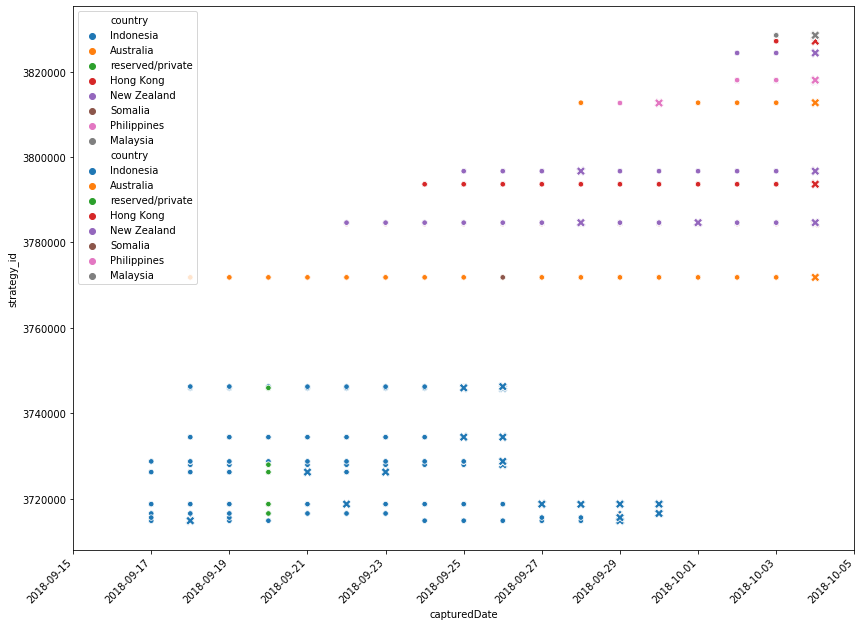

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
p1= sns.scatterplot(x='capturedDate', y='strategy_id', hue='country', marker="o", s=30, 
                    data=dataBeforeLastDate, ax=ax, 
                    hue_order=['Indonesia', 'Australia', 'reserved/private', 'Hong Kong', 
                               'New Zealand', 'Somalia', 'Philippines', 'Malaysia'] )
p2= sns.scatterplot(x='capturedDate', y='strategy_id', hue='country', marker="X", s=80, 
                    data=dataOnLastDate, ax=ax,
                    hue_order=['Indonesia', 'Australia', 'reserved/private', 'Hong Kong', 
                               'New Zealand', 'Somalia', 'Philippines', 'Malaysia'] )
p1.set_xlim(datetime.date(2018, 9, 15), datetime.date(2018, 10, 5))
plt.xticks(rotation=45, ha='right')

### Task #4: Spark Movie Recommendation (optional)

For running pyspark script to generate movies and genre popularity, make sure working folder is at `src/` (where you should see below folder structure)

```
.
├── createDocs.sh
├── lib
├── logs
├── logs.txt
├── main.py
├── modules
└── spark-warehouse
```

and run command 

```Python
spark-submit modules/sparkScript.py
```

or

```Python
spark-submit modules/sparkScript_alternative.py
```

For first (sparkScript.py), popularity is defined as number of ratings given to a particular movie or genre. The results of movies popularity and genres popularity are as follow,

In [9]:
movies_popularity = pd.read_csv('../results/movies_popularity.csv')
genre_popularity  = pd.read_csv('../results/genre_popularity.csv')

In [10]:
movies_popularity[:10]

,movieId,title,genres,movieId.1,popularity
0,145518,Rubberneck (2013),Thriller,145518,1
1,167438,Perry Mason: The Case of the Defiant Daughter ...,(no genres listed),167438,1
2,148753,Bawdy Tales (1973),Drama,148753,1
3,174361,The Gerber Syndrome: Il Contagio (2011),Horror,174361,1
4,164883,Where's the Dragon? (2015),(no genres listed),164883,1
5,187951,Father of Lights (2012),Documentary,187951,1
6,179713,Ponies (2012),Drama,179713,1
7,141442,Los tontos y los estúpidos,(no genres listed),141442,1
8,163202,Do You Believe in Miracles? The Story of the 1...,Documentary,163202,1
9,124717,Path to Paradise: The Untold Story of the Worl...,Drama,124717,1


In [11]:
genre_popularity[:10]

,genres,popularity
0,Drama,12191048
1,Comedy,9999184
2,Action,8214956
3,Thriller,7489628
4,Adventure,6452309
5,Romance,5078478
6,Sci-Fi,4740208
7,Crime,4631581
8,Fantasy,3118549
9,Children,2381124


For second (sparkScript_alternative.py), popularity is defined as average rating received from users given a movie or genre. The results of movies popularity and genres popularity are as follow,

In [12]:
movies_popularity_alternative = pd.read_csv('../results/movies_popularity_alternative.csv')
genre_popularity_alternative  = pd.read_csv('../results/genre_popularity_alternative.csv')

In [13]:
movies_popularity_alternative[:10]

,movieId,title,genres,movieId.1,sum(rating),count(userId),popularity
0,164304,Homeless in America (2004),(no genres listed),164304,1.0,2,0.5
1,148753,Bawdy Tales (1973),Drama,148753,0.5,1,0.5
2,160614,Big Man - A Policy for Hell (1988),(no genres listed),160614,0.5,1,0.5
3,192453,A Dog and Pony Show (2018),Children|Comedy,192453,1.0,2,0.5
4,191089,41 (2013),Drama|Sci-Fi,191089,0.5,1,0.5
5,179035,Immigration Game (2017),Action|Drama|Thriller,179035,0.5,1,0.5
6,133735,Betty Blowtorch: And Her Amazing True Life Adv...,Documentary,133735,0.5,1,0.5
7,150558,AWOL-72 (2015),Thriller,150558,0.5,1,0.5
8,109355,13 Fighting Men (1960),Western,109355,0.5,1,0.5
9,186067,Before Dawn (2012),Horror,186067,0.5,1,0.5


In [14]:
genre_popularity_alternative[:10]

,genres,sum(sum(rating)),sum(count(userId)),popularity
0,Film-Noir,1071515.5,272742,3.928678
1,War,5414372.5,1426112,3.796597
2,Documentary,1281994.5,345471,3.710860
3,Crime,17060532.5,4631581,3.683522
4,Drama,44818812.0,12191048,3.676371
5,Mystery,8102331.0,2210388,3.665570
6,IMAX,3988759.0,1102179,3.618976
7,Animation,6504126.5,1803041,3.607309
8,Western,1940615.5,542424,3.577673
9,Musical,3931299.5,1109674,3.542752
